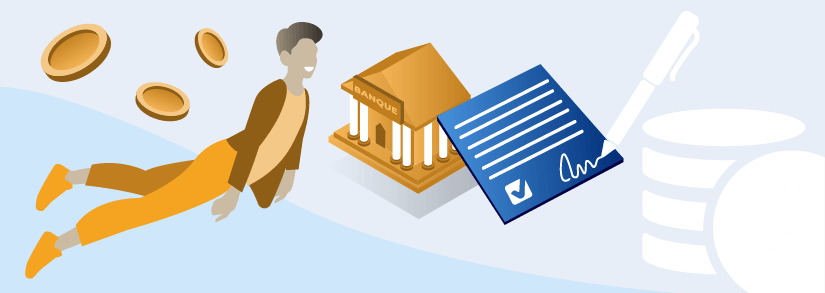

L'objet de ce projet est d'étudier des algorithmes de scoring aidant à la décision d'un accord de prêt. 

La finalité est d'utiliser des historiques de prêts et d'informations financières pour évaluer la probabilité de remboursement du prêt par le candidat. 

Les utilisateurs du modèle de scoring sont les chargés de relation client. Ils devront être capables de donner une justification concrête pour la non-attribution d'un prêt. Le modèle doit donc être facilement interprétable. 

# Importation des données et des librairies

In [1]:
# numpy and pandas pour la manipulation des données
import numpy as np
import pandas as pd
# matplotlib and seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns

# File system management
import os

# Suppress warnings
import warnings

warnings.filterwarnings('ignore')

# Les fonctions personnalisées

from my_functions import *

from fe_homecredit import *

# Palette de couleur
a, b, c, d, e = [
    plt.cm.Blues, plt.cm.Oranges, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples
]

Le projet porte sur l'analyse d'un groupement de fichiers. Voici la liste des fichiers :

In [2]:
# List files available
print(os.listdir(chemin))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


## La base de données application_train

In [3]:
application_train = pd.read_csv( chemin + 
    "application_train.csv",
    low_memory=False)

nb_l_c(application_train)

application_train.head()

La base de données contient 307511 lignes et 122 colonnes


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


La base de données application_train regroupe les informations de demande de prêts. Chaque demande correspond à une ligne et est identifiée grâce à la variable "SK_ID_CURR". Il s'agit de la base de données d'entraînement. La variable TARGET correspond à la variable cible. Quand elle indique 0, le prêt est remboursé, quand elle indique 1, le prêt n'est pas remboursé..

In [4]:
quantifier_val_manq(application_train)

Nombre de cellules avec des données manquantes :  9152465
Pourcentage du nombre de cellules avec des données manquantes :  24.4  %
Nombre de lignes avec au moins une donnée manquante :  298909
Pourcentage de lignes avec au moins une donnée manquante :  97.2  %


,Nombre de valeurs manquantes,Taux de valeurs manquantes
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
...,...,...
NAME_FAMILY_STATUS,0,0.0
NAME_EDUCATION_TYPE,0,0.0
NAME_INCOME_TYPE,0,0.0
AMT_ANNUITY,12,0.0


## La base de données bureau

In [5]:
bureau = pd.read_csv( chemin + "bureau.csv",
                     low_memory=False)

nb_l_c(bureau)

bureau.describe()

La base de données contient 1716428 lignes et 17 colonnes


,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


La base de données bureau regroupe les données des précédents crédits du clients accordés par d'autres banques. Chaque ligne correspond à un crédit, mais un client demandant un prêt peu avoir plusieurs lignes (plusieurs crédits en cours).
( 1 ligne dans la base de données application_train/test = 1 ou plusieurs lignes dans la base de données bureau)

In [6]:
quantifier_val_manq(bureau)

Nombre de cellules avec des données manquantes :  3939947
Pourcentage du nombre de cellules avec des données manquantes :  13.5  %
Nombre de lignes avec au moins une donnée manquante :  1676762
Pourcentage de lignes avec au moins une donnée manquante :  97.7  %


,Nombre de valeurs manquantes,Taux de valeurs manquantes
AMT_ANNUITY,1226791,71.5
AMT_CREDIT_MAX_OVERDUE,1124488,65.5
DAYS_ENDDATE_FACT,633653,36.9
AMT_CREDIT_SUM_LIMIT,591780,34.5
AMT_CREDIT_SUM_DEBT,257669,15.0
DAYS_CREDIT_ENDDATE,105553,6.1
CREDIT_ACTIVE,0,0.0
CREDIT_CURRENCY,0,0.0
DAYS_CREDIT,0,0.0
CREDIT_DAY_OVERDUE,0,0.0


## La base de données bureau_balance

In [7]:
bureau_balance = pd.read_csv( chemin + 
    "bureau_balance.csv",
    low_memory=False)

nb_l_c(bureau_balance)

bureau_balance.head()

La base de données contient 27299925 lignes et 3 colonnes


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [8]:
bureau_balance.describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


La base de données bureau_balance correspond aux données de la base de données bureau mais par mois. Chaque ligne correspond à un mois de crédit. Il y a autant de lignes que le crédit a de mois.

In [9]:
quantifier_val_manq(bureau_balance)

Nombre de cellules avec des données manquantes :  0
Pourcentage du nombre de cellules avec des données manquantes :  0.0  %
Nombre de lignes avec au moins une donnée manquante :  0
Pourcentage de lignes avec au moins une donnée manquante :  0.0  %


,Nombre de valeurs manquantes,Taux de valeurs manquantes
SK_ID_BUREAU,0,0.0
MONTHS_BALANCE,0,0.0
STATUS,0,0.0


# Exploration et préparation des bases de données

Afin que les données puissent être éventuellement rassemblées en une seule base de données, il est nécessaire de regarder si les bases de données disposent de variables qui permettent de les relier les unes aux autres.

Les différentes bases de données se recoupent suivant 3 types de numéro d'identifications:
- SK_ID_CURR
- SK_ID_BUREAU
- SK_ID_PREV.
Il est possible de rassembler les différentes bases de données en suivant le schéma de recoupe suivant :

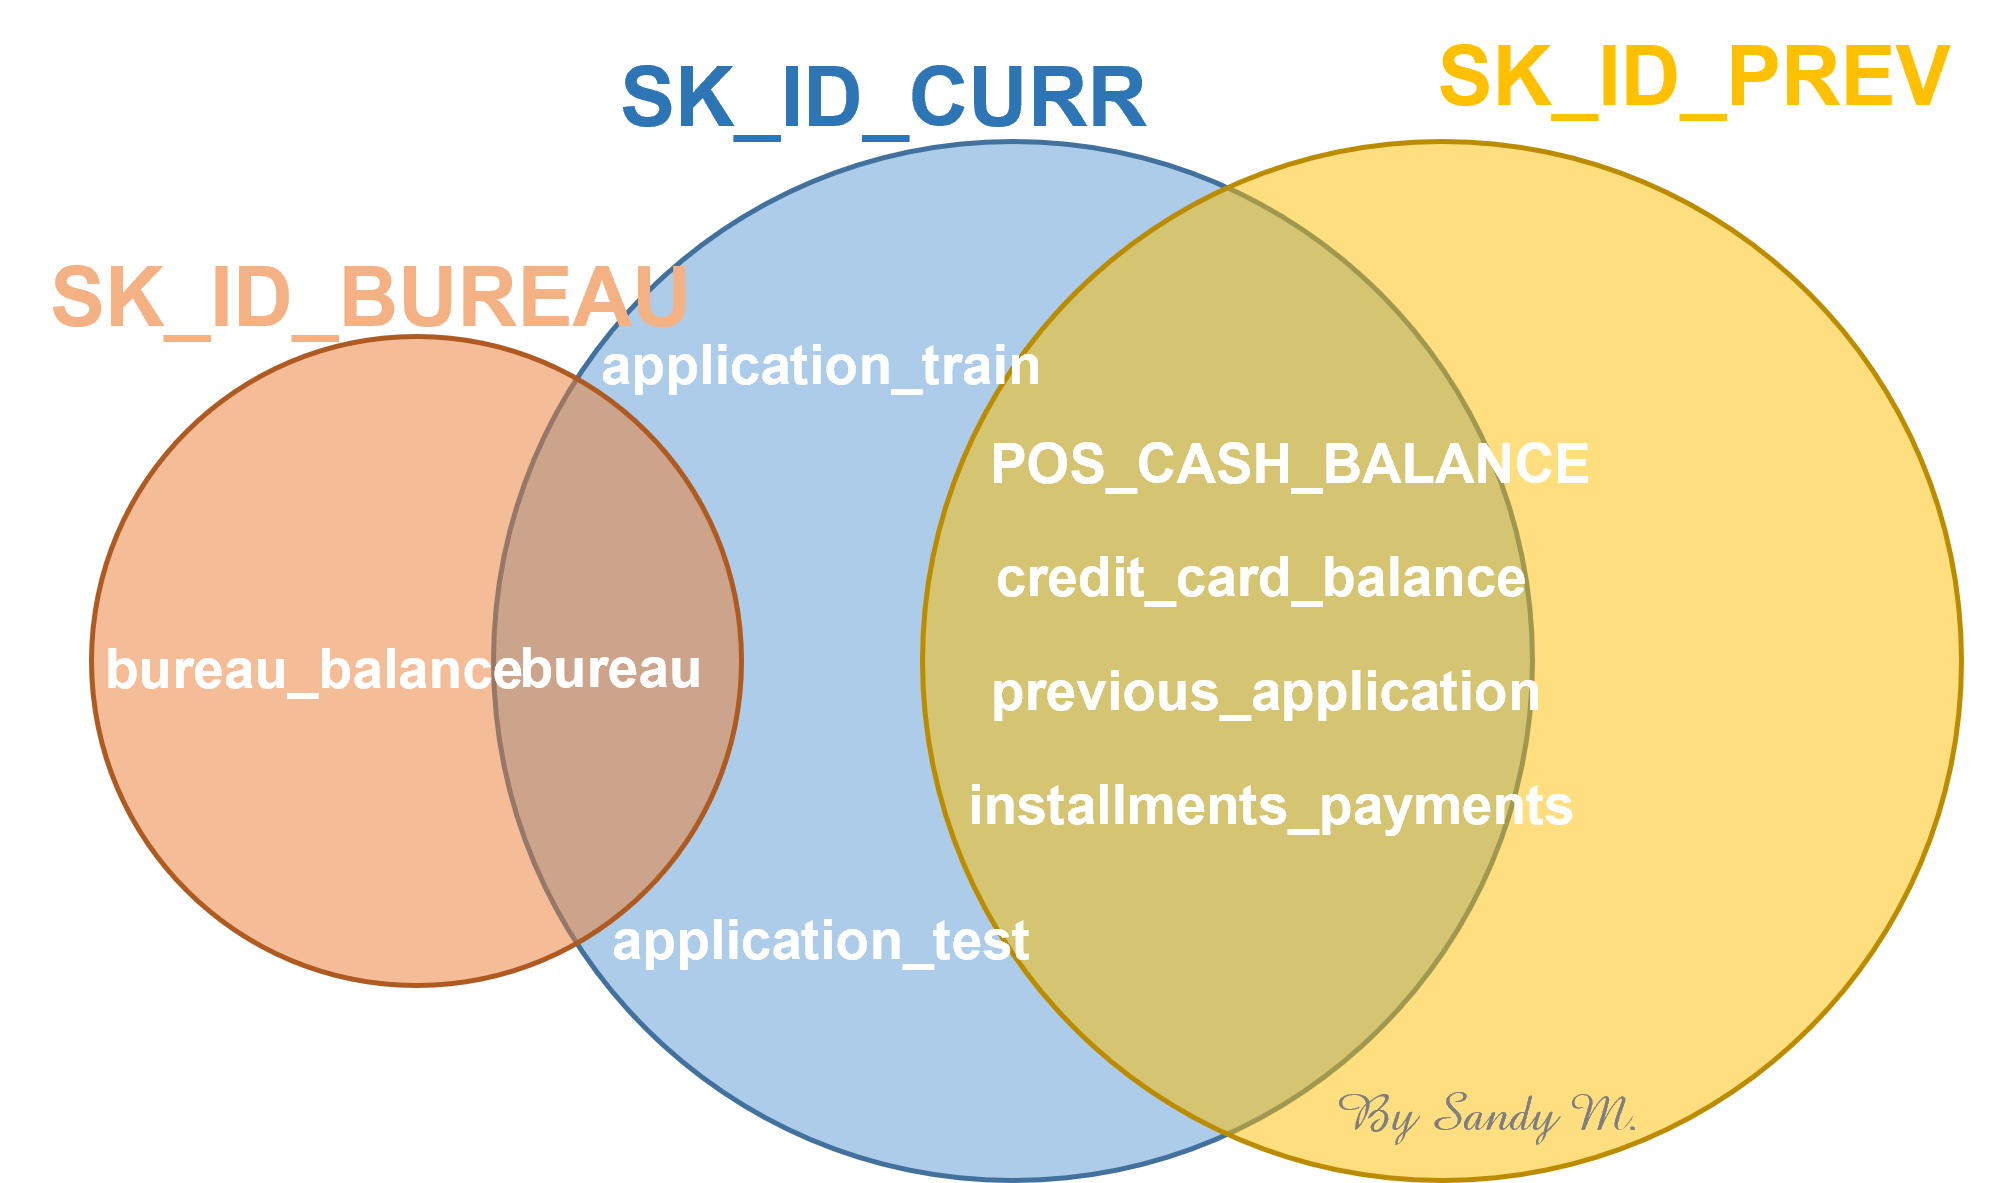

## La base de données "application_train"

### Quantification des valeurs manquantes

Regardons si les variables contiennent beaucoup de valeurs manquantes.

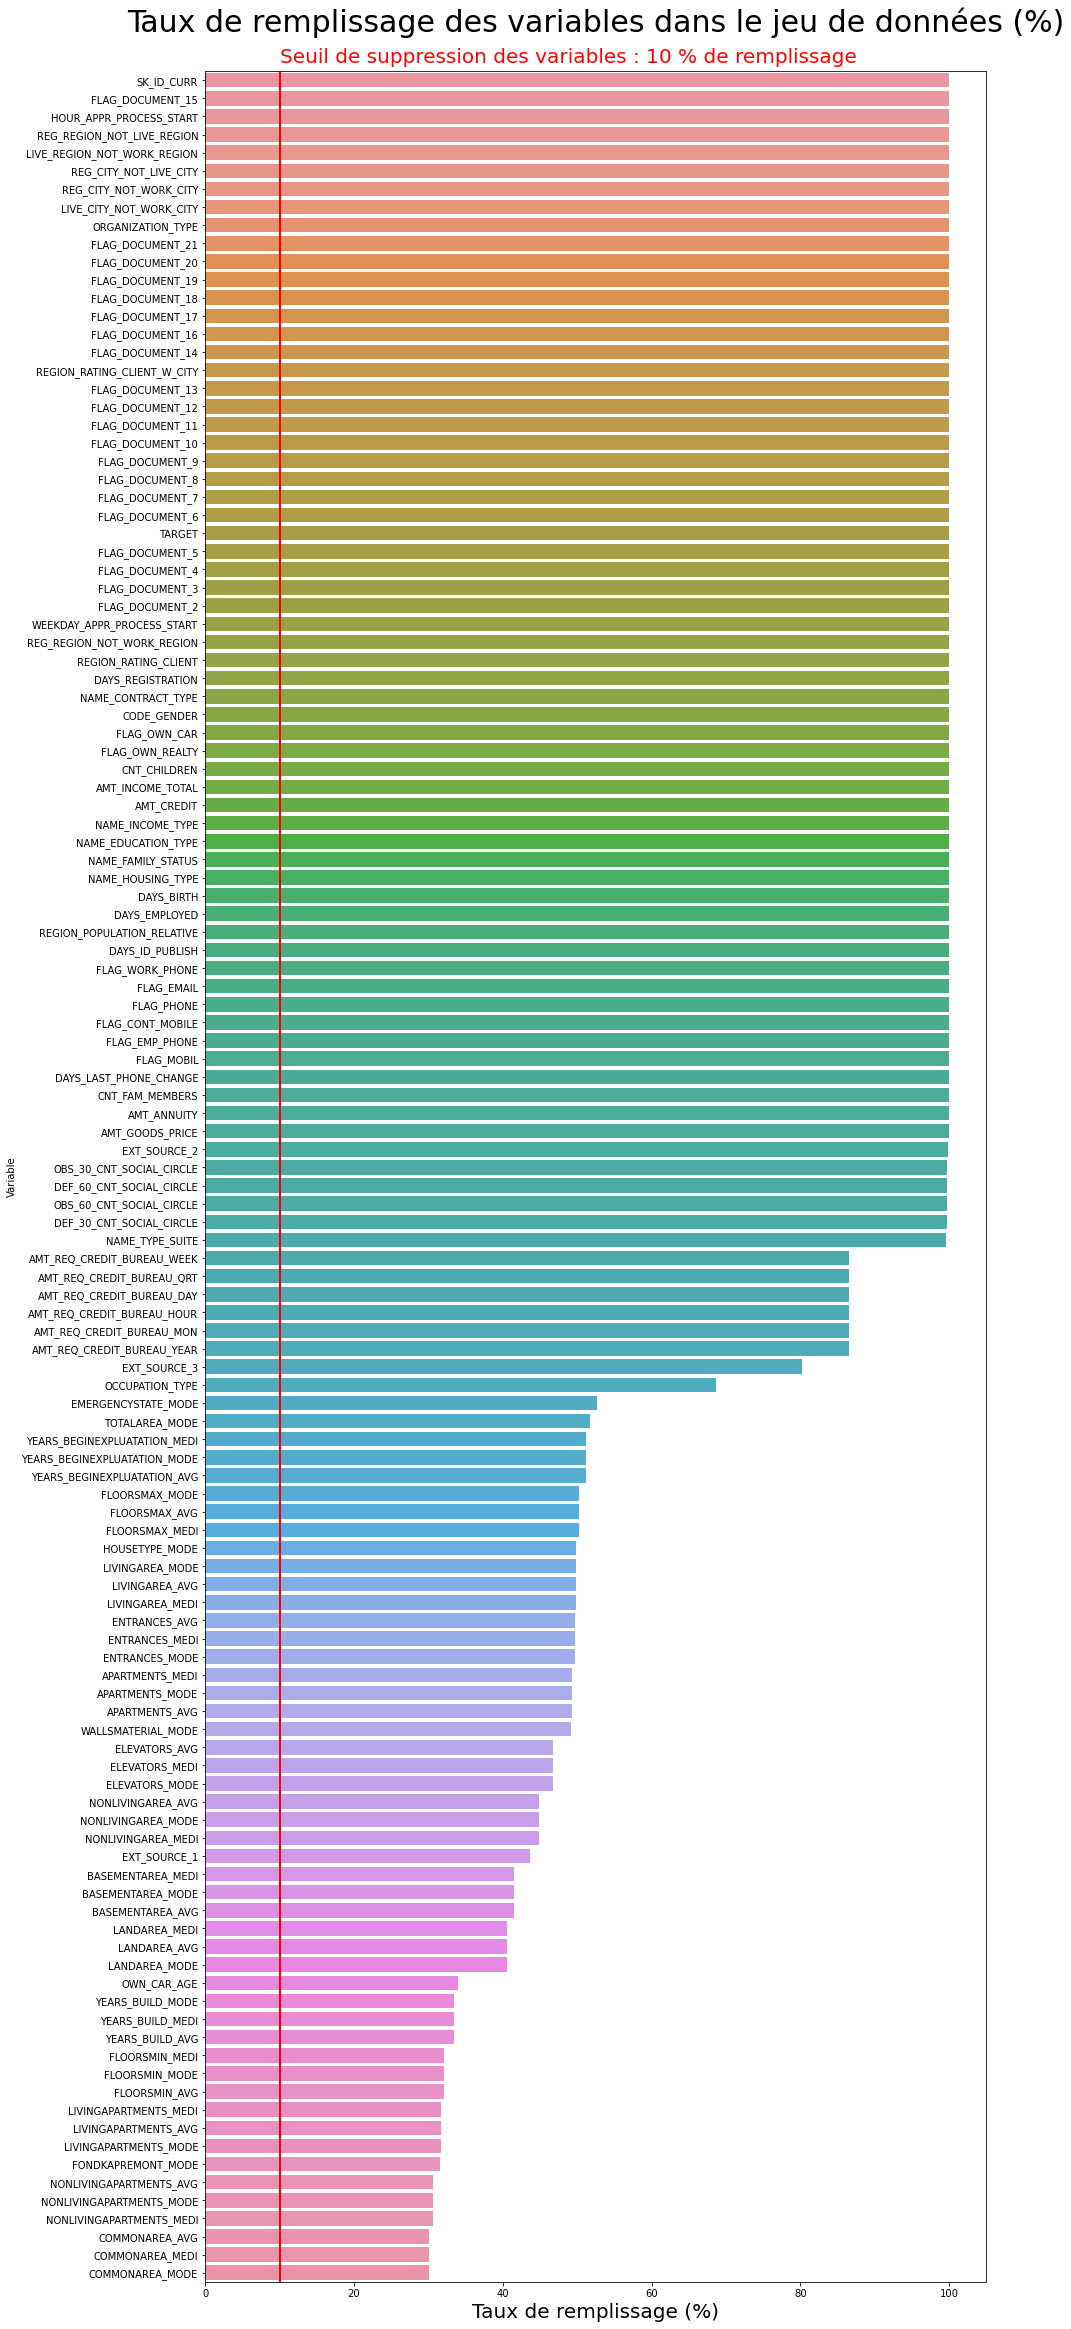

In [10]:
graphique_remplissage(application_train, 10)

Toutes les variables ont un taux de remplissage supérieur à 10%. Elles vont toutes être conservées. Après l'examen des différentes variables il faudra trouver un moyen d'imputer les valeurs manquantes.

La fonction application_train_net() permet de nettoyer la base de données et d'imputer les valeurs manquantes.

In [11]:
application_train = application_train_net()

La base de données 'application_train' présente  307511 entrées pour  122 variables
L'étape de nettoyage des variables est terminée


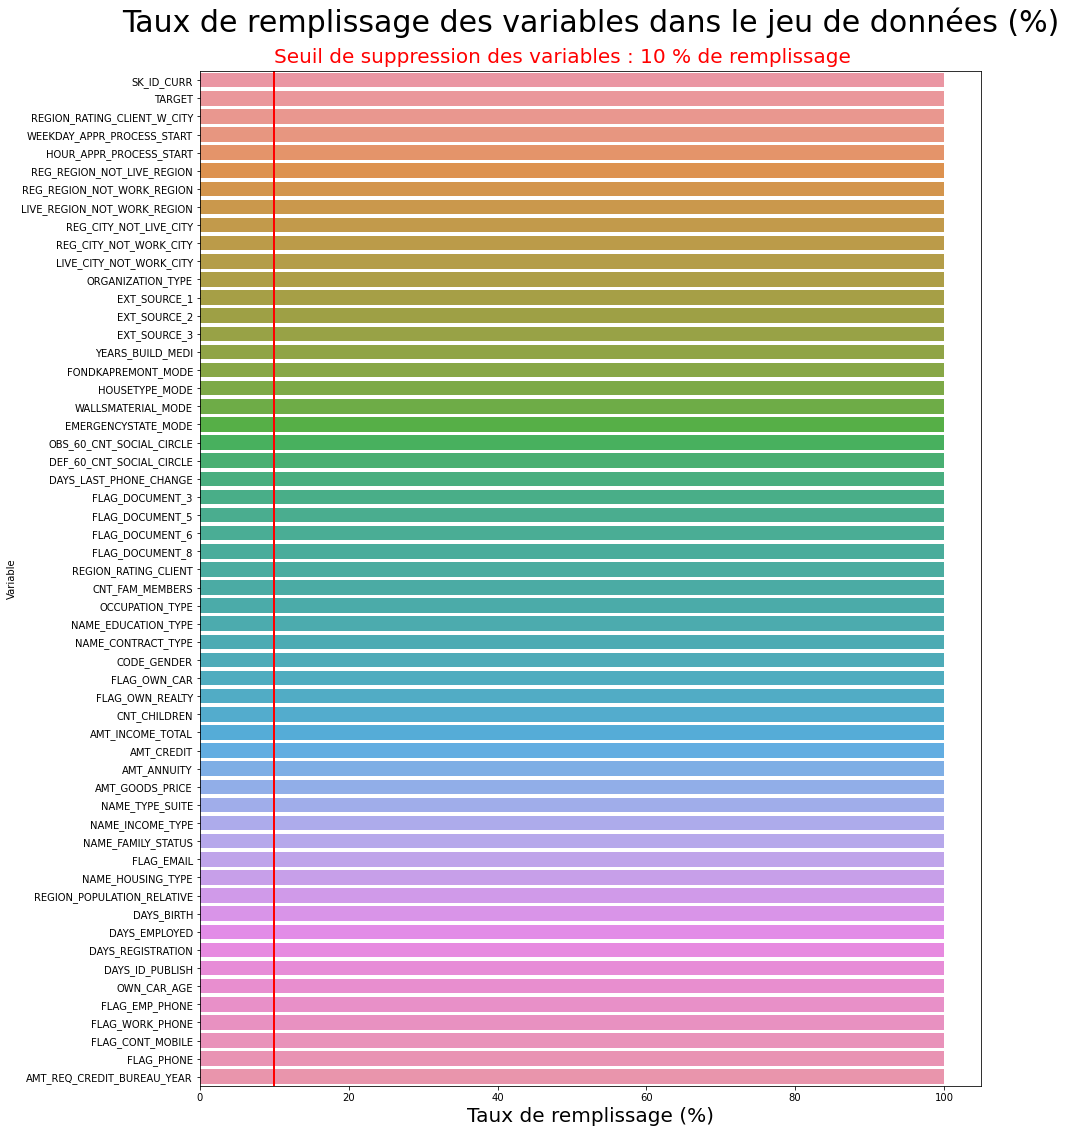

In [12]:
graphique_remplissage(application_train, 10)

### Exploration des variables d'intérêt

#### La distribution de la variable TARGET

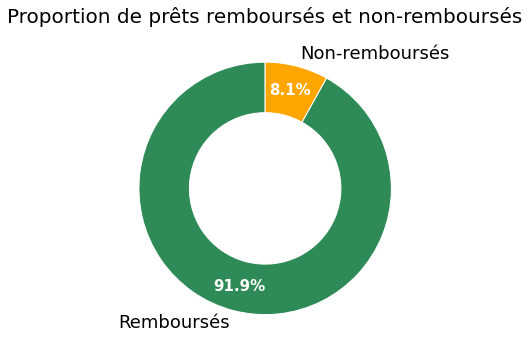

In [13]:
ring_target(application_train, 'TARGET')

Pour rappel, si TARGET = 0, le crédit a été remboursé, si TARGET = 1, le crédit n'a pas été remboursé.
Nous remarquons qu'il y a un fort déséquilibre entre le nombre de prêt remboursé et le nombre de prêt non-remboursé. Il faudra faire attention à ce déséquilibre. Il sera par exemple possible d'utiliser une classification pénalisée pour mettre un poids supplémentaire sur la classe minoritaire. Cela permettra au modèle de faire moins d'erreurs de classification portant sur cette classe (ici TARGET = 1). 
Dans l'ensemble de la base de données, la proportion de prêts non-remboursés est de 8% et la proportion de prêts remboursés dans les temps est de 92%.

#### Les variables de catégories

16 variables de catégorie composent cette base de données. Nous allons les regarder une par une pour en évaluer la pertinence et discuter de l'information qu'elles nous fournissent.

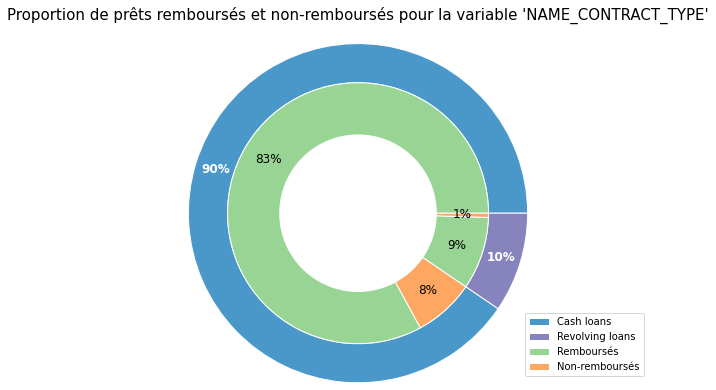

In [14]:
two_rings_TARGET(application_train, 'NAME_CONTRACT_TYPE')
plt.title(
    "Proportion de prêts remboursés et non-remboursés pour la variable 'NAME_CONTRACT_TYPE'",
    fontsize=15,
    pad=30)
plt.show()

La variable "Name_CONTRACT_TYPE" représente le type de contrat relatif à la demande de crédit. Il peut s'agir d'un prêt renouvelable ('revolving loans') ou un prêt en espèce ('Cash loans'). Le type de contrat 'Cash loans' est le plus représenté dans la base de données. Cependant, c'est sur les prêts 'revolving loans' que la proportion de défaut de paiement est la plus importante.

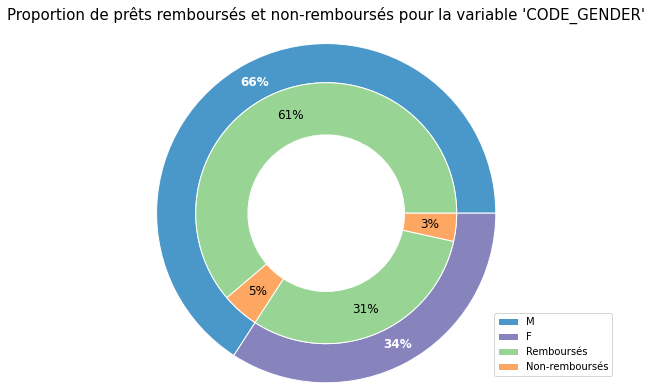

In [15]:
two_rings_TARGET(application_train, 'CODE_GENDER')
plt.title(
    "Proportion de prêts remboursés et non-remboursés pour la variable 'CODE_GENDER'",
    fontsize=15,
    pad=30)
plt.show()

La variable "CODE_GENDER" correspond au genre de la personne faisant la demande de prêt. Il y a 4 valeurs "non-renseigné" ('XNA'). Elles sont remplacées par la valeur 'M', qui est la valeur la plus fréquente dans la base de données.

Sur cette représentation, les hommes sont largement majoritaire dans cette base de données et les femmes sont davantage très légèrement en défaut de remboursement.

La variable NAME_TYPE_SUITE montrait quelques valeurs manquantes. On considère que s'il n'y a pas de détails concernant les accompagnants c'est que les clients n'étaient pas accompagnés. Les NaN sont remplacés par "Unaccompanied".

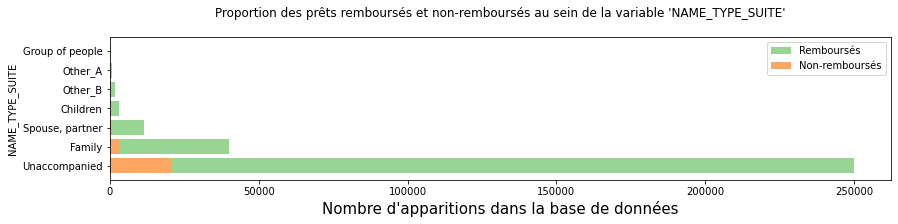

In [16]:
barplot_cat_target(application_train, 'NAME_TYPE_SUITE')
plt.title(
    "Proportion des prêts remboursés et non-remboursés au sein de la variable 'NAME_TYPE_SUITE'",
    pad=20)
plt.show()

Dans la grande majorité des cas, le client est venu faire sa demande seul.

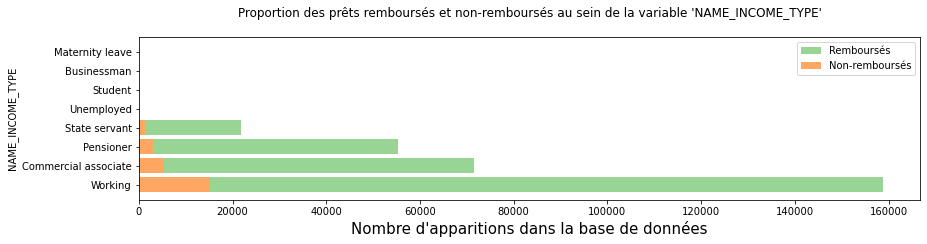

In [17]:
barplot_cat_target(application_train, 'NAME_INCOME_TYPE')
plt.title(
    "Proportion des prêts remboursés et non-remboursés au sein de la variable 'NAME_INCOME_TYPE'",
    pad=20)
plt.show()

Au sein de la base de données, les clients sont majoritairement des salariés, viennent ensuite les associés commerciaux,  les retraités et les fonctionnaires d'état.

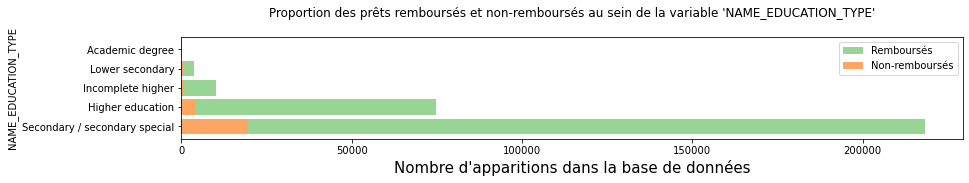

In [18]:
barplot_cat_target(application_train, 'NAME_EDUCATION_TYPE')
plt.title(
    "Proportion des prêts remboursés et non-remboursés au sein de la variable 'NAME_EDUCATION_TYPE'",
    pad=20)
plt.show()

Dans l'ensemble, les clients ont suivi une éducation du secondaire ou supérieure.

#### Test du khi 2

Le test du CHI-2 (ou KHI-2) est utilisé ici pour avoir une idée de la dépendance des variables qualitatives. 

In [19]:
app_train_khi_2 = application_train.select_dtypes(include='object')
app_train_khi_2
for col1 in app_train_khi_2.columns:
    for col2 in app_train_khi_2.columns:
        if col1 > col2:
            test_chi_2_XY(app_train_khi_2, col1, col2)

La p-value pour le test du CHI-2 entre la variable  NAME_CONTRACT_TYPE et la variable  CODE_GENDER est  0.0
H0 rejetée : les variables  NAME_CONTRACT_TYPE et  CODE_GENDER  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  NAME_CONTRACT_TYPE et la variable  FLAG_OWN_CAR est  0.026
H0 rejetée : les variables  NAME_CONTRACT_TYPE et  FLAG_OWN_CAR  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  NAME_CONTRACT_TYPE et la variable  FLAG_OWN_REALTY est  0.0
H0 rejetée : les variables  NAME_CONTRACT_TYPE et  FLAG_OWN_REALTY  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  NAME_CONTRACT_TYPE et la variable  FONDKAPREMONT_MODE est  0.0
H0 rejetée : les variables  NAME_CONTRACT_TYPE et  FONDKAPREMONT_MODE  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  NAME_CONTRACT_TYPE et la variable  HOUSETYPE_MODE est  0.0
H0 rejetée : les variables  NAME_CONTRACT_TYPE et  HOUSETYPE_MODE  ne s

La p-value pour le test du CHI-2 entre la variable  NAME_FAMILY_STATUS et la variable  FLAG_OWN_CAR est  0.0
H0 rejetée : les variables  NAME_FAMILY_STATUS et  FLAG_OWN_CAR  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  NAME_FAMILY_STATUS et la variable  FLAG_OWN_REALTY est  0.0
H0 rejetée : les variables  NAME_FAMILY_STATUS et  FLAG_OWN_REALTY  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  NAME_FAMILY_STATUS et la variable  NAME_EDUCATION_TYPE est  0.0
H0 rejetée : les variables  NAME_FAMILY_STATUS et  NAME_EDUCATION_TYPE  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  NAME_FAMILY_STATUS et la variable  FONDKAPREMONT_MODE est  0.0
H0 rejetée : les variables  NAME_FAMILY_STATUS et  FONDKAPREMONT_MODE  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  NAME_FAMILY_STATUS et la variable  HOUSETYPE_MODE est  0.0
H0 rejetée : les variables  NAME_FAMILY_STATUS et  HOUSET

La p-value pour le test du CHI-2 entre la variable  WEEKDAY_APPR_PROCESS_START et la variable  WALLSMATERIAL_MODE est  0.002
H0 rejetée : les variables  WEEKDAY_APPR_PROCESS_START et  WALLSMATERIAL_MODE  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  WEEKDAY_APPR_PROCESS_START et la variable  EMERGENCYSTATE_MODE est  0.039
H0 rejetée : les variables  WEEKDAY_APPR_PROCESS_START et  EMERGENCYSTATE_MODE  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  ORGANIZATION_TYPE et la variable  NAME_CONTRACT_TYPE est  0.0
H0 rejetée : les variables  ORGANIZATION_TYPE et  NAME_CONTRACT_TYPE  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  ORGANIZATION_TYPE et la variable  CODE_GENDER est  0.0
H0 rejetée : les variables  ORGANIZATION_TYPE et  CODE_GENDER  ne sont pas indépendantes
La p-value pour le test du CHI-2 entre la variable  ORGANIZATION_TYPE et la variable  FLAG_OWN_CAR est  0.0
H0 rejetée : les variabl

Le test montre que seuls trois couples de variables sont indépendants :
- NAME_CONTRACT_TYPE et  EMERGENCYSTATE_MODE
- FLAG_OWN_REALTY et  FLAG_OWN_CAR
- NAME_TYPE_SUITE et  EMERGENCYSTATE_MODE

Il est possible d'afficher une heatmap qui traduit le rapport entre les tableaux des $n_{ij}$  et les tableaux des $f_{i}$ x $n_{j}$. La couleur la plus claire représente un couple de modalités dont le rapport entre la mesure statistique locale et la mesure statistique globale est proche de 1. Les couples de modalités en foncé sont ceux qui ont un écart entre leur mesure et leur valeur d'indépendance élevé.

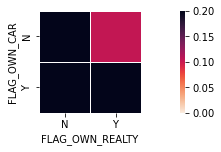

In [20]:
tableau_chi_2_color(app_train_khi_2, 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY')

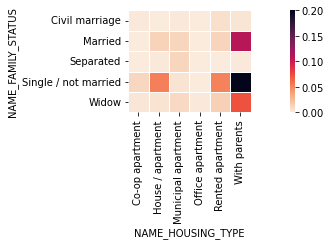

In [21]:
tableau_chi_2_color(app_train_khi_2, 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE')

Les différentes heatmap corroborent bien la dépendance entre les variables qualitatives (qui était déjà établie avec le test du CHI-2)

#### Les variables quantitatives (float)

###### La variable AMT_INCOME_TOTAL

La variable AMT_INCOME_TOTAL représente le revenu total annuel du client au moment de la demande. Pour davantage de visibilité, les montants en dollars sont convertis en k$.

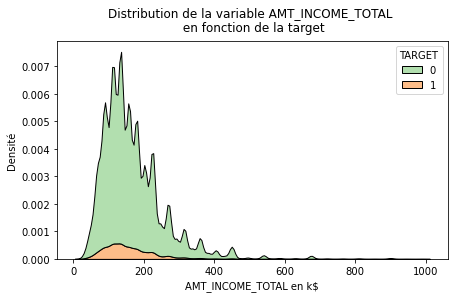

In [22]:
graph_hue_target(application_train[application_train.AMT_INCOME_TOTAL < 1000], "AMT_INCOME_TOTAL")
plt.xlabel('AMT_INCOME_TOTAL en k$')
plt.show()

Sur ce graphique, il n'est pas possible de visualiser une tendance pour les prêts remboursés et pour ceux non-remboursés. Néanmoins, il donne l'impression que les clients qui ont un revenu annuel supérieur à 400 k$ ont toujours remboursé leur prêt.

Classer un client uniquement par le montant annuel de ses revenus n'est pas suffisant. Il est important de comparer ses revenus à ceux qui ont le même type de métier, le même travail ainsi que la même éducation. C'est l'objet des trois nouvelles variables créées en suivant.

Ce montant permet de pouvoir positionner un client par rapport à l'endroit où il travail, son type de poste et son niveau d'éducation.

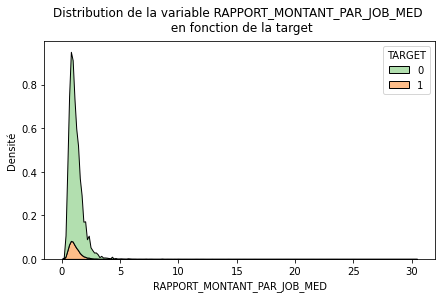

In [23]:
application_train = ajout_rapport_montant(application_train)

graph_hue_target(application_train, 'RAPPORT_MONTANT_PAR_JOB_MED')
plt.xlabel('RAPPORT_MONTANT_PAR_JOB_MED')
plt.show()

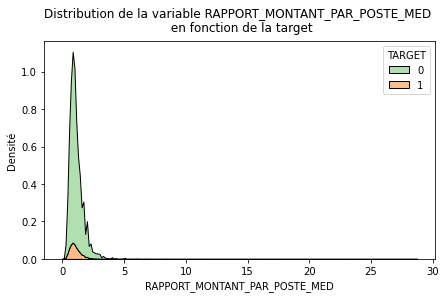

In [24]:
graph_hue_target(application_train, 'RAPPORT_MONTANT_PAR_POSTE_MED')
plt.xlabel('RAPPORT_MONTANT_PAR_POSTE_MED')
plt.show()

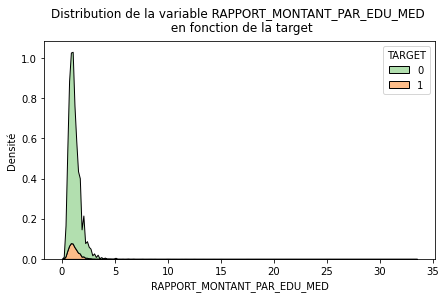

In [25]:
graph_hue_target(application_train, 'RAPPORT_MONTANT_PAR_EDU_MED')
plt.xlabel('RAPPORT_MONTANT_PAR_EDU_MED')
plt.show()

Aucune surprise quant à l'observation disant que plus le rapport entre le montant annuel des revenus d'un client et celui de quelqu'un qui lui ressemble est élevé, plus le prêt est remboursé.

###### La variable AMT_CREDIT

La variable AMT_CREDIT correspond au montant emprunté.

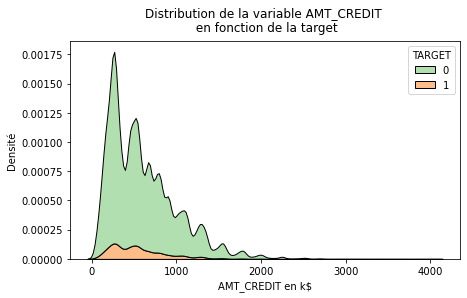

In [26]:
graph_hue_target(application_train, 'AMT_CREDIT')
plt.xlabel('AMT_CREDIT en k$')
plt.show()

Les prêts qui ne sont pas remboursés entièrement ne sont pas forcément les prêts avec les montants les plus importants.

Pour mieux apprécier cette variable, une variable correspondant au rapport entre le montant du crédit et le montant annuel des revenus du client est créée.

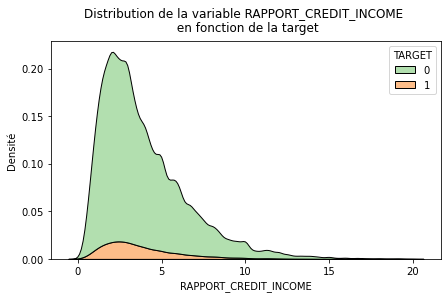

In [27]:
application_train['RAPPORT_CREDIT_INCOME'] = application_train[
    'AMT_CREDIT'] / application_train['AMT_INCOME_TOTAL']

graph_hue_target(application_train[application_train.RAPPORT_CREDIT_INCOME < 20], 'RAPPORT_CREDIT_INCOME')
plt.xlabel('RAPPORT_CREDIT_INCOME')
plt.show()

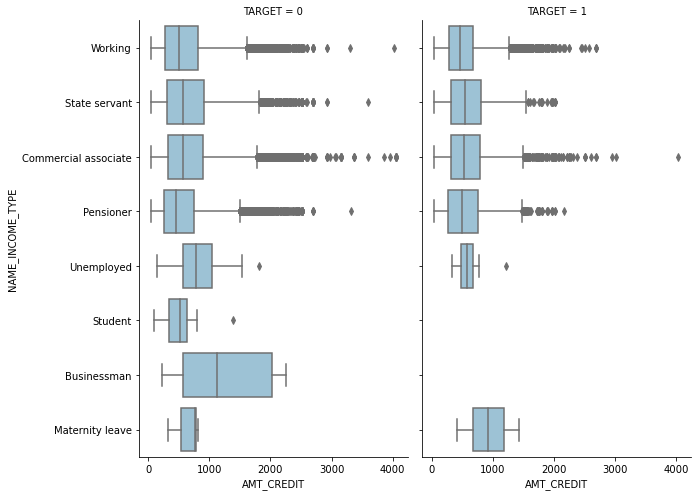

In [28]:
sns.catplot(x="AMT_CREDIT", y="NAME_INCOME_TYPE", col="TARGET",\
            data=application_train,color = a(0.4),kind="box", height=7, aspect=.7)
plt.show()

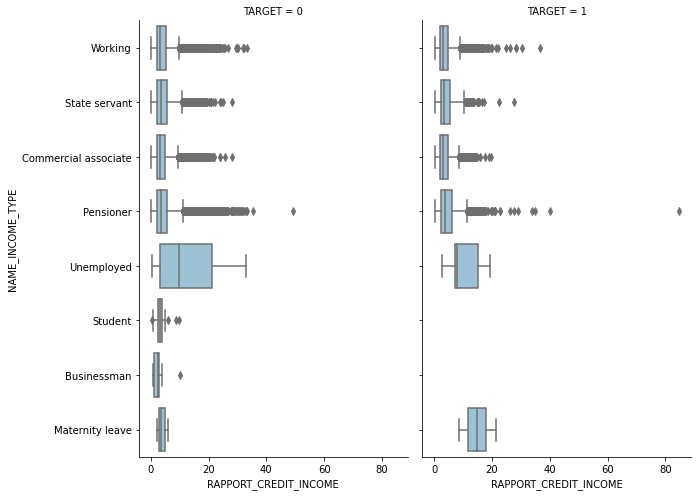

In [29]:
sns.catplot(x="RAPPORT_CREDIT_INCOME", y="NAME_INCOME_TYPE", col="TARGET",\
            data=application_train,color = a(0.4),kind="box", height=7, aspect=.7)
plt.show()

Deux types de "NAME_INCOME_TYPE" n'ont pas de clients qui ne remboursent pas leur prêt. Il s'agit des étudiants et des businessmen. Pour les modalités "Unemployed" et "maternity leave" (attention cette dernière est très minoritaire), la cible fait varier la distribution des rapports montant des revenus/montant du prêt.

###### La variable AMT_ANNUITY

La variable AMT_ANNUITY fait référence à la mensualité de remboursement.

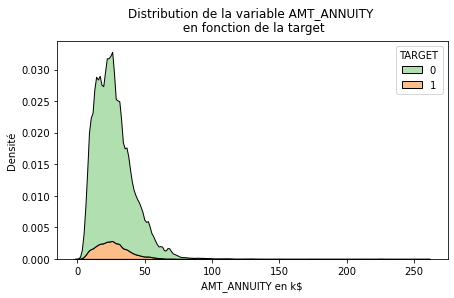

In [30]:
graph_hue_target(application_train, 'AMT_ANNUITY')
plt.xlabel('AMT_ANNUITY en k$')
plt.show()

Encore une fois, les défauts de remboursement ne sont pas sur des montants élevés.

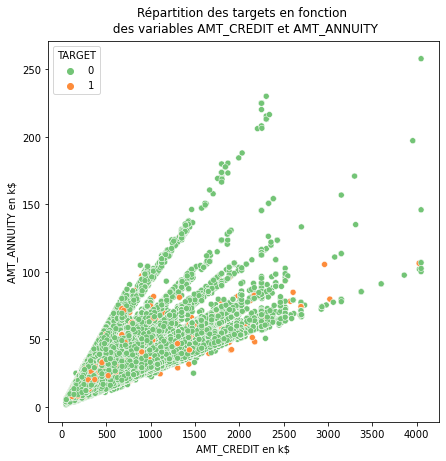

In [31]:
scatter_target(application_train, "AMT_CREDIT", "AMT_ANNUITY")
plt.xlabel('AMT_CREDIT en k$')
plt.ylabel('AMT_ANNUITY en k$')
plt.show()

Sur cette représentation on remarque une corrélation entre le montant du crédit et le montant de la mensualité (ce qui est normal car la mensualité est simplement le montant du crédit divisé par sa durée).

Une nouvelle variable est créée, il  s'agit du rapport entre la mensualité et le montant des revenus annuels.

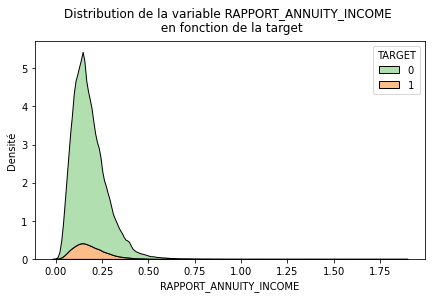

In [32]:
application_train['RAPPORT_ANNUITY_INCOME'] = application_train[
    'AMT_ANNUITY'] / application_train['AMT_INCOME_TOTAL']

graph_hue_target(application_train, 'RAPPORT_ANNUITY_INCOME')
plt.xlabel('RAPPORT_ANNUITY_INCOME')
plt.show()

Là encore, les rapports les plus importants sont ceux qui sont des prêts intégralement remboursés.

Les variables 'EXT_SOURCE_' représente un score normalisé (entre 0 et 1) des ressources extérieures des clients.

In [33]:
application_train[colonnes_EXT].describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,307506.000000,307506.000000,307506.000000
mean,0.219022,0.513288,0.409578
std,0.285373,0.192333,0.268177
min,0.000000,0.000000,0.000000
25%,0.000000,0.390781,0.178760
50%,0.000000,0.565467,0.459690
75%,0.456257,0.663422,0.636376
max,0.962693,0.855000,0.896010


Les trois ressources ont des distributions assez différentes.

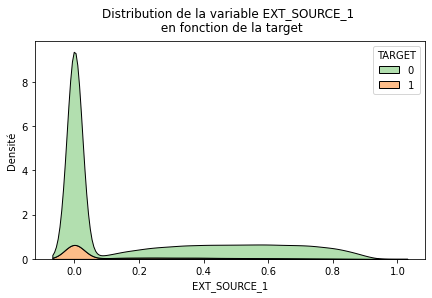

In [34]:
graph_hue_target(application_train, 'EXT_SOURCE_1')
plt.xlabel('EXT_SOURCE_1')
plt.show()

Dans l'ensemble, les prêts non remboursés ont un score numéro 1 égal à 0.

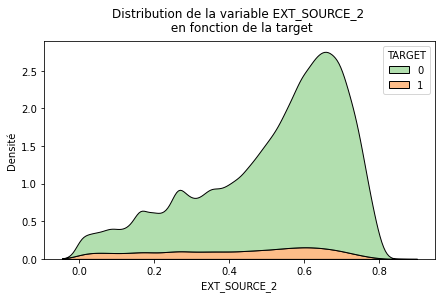

In [35]:
graph_hue_target(application_train, 'EXT_SOURCE_2')
plt.xlabel('EXT_SOURCE_2')
plt.show()

Par contre, pour la ressource numéro 2, il n'y a pas vraiment de tendance suivant que le prêt est remboursé ou non.

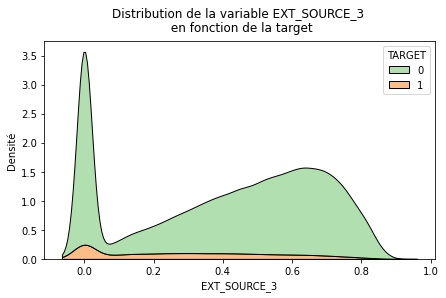

In [36]:
graph_hue_target(application_train, 'EXT_SOURCE_3')
plt.xlabel('EXT_SOURCE_3')
plt.show()

Une variable reflétant la moyenne de ces 3 scores est créée.

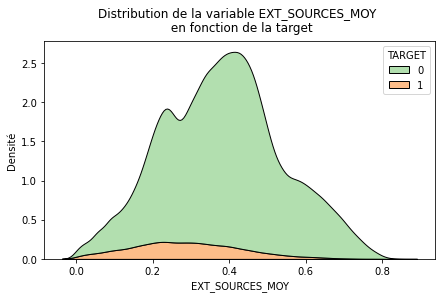

In [37]:
application_train['EXT_SOURCES_MOY'] = application_train[[
    'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'
]].mean(axis=1)

graph_hue_target(application_train, 'EXT_SOURCES_MOY')
plt.xlabel('EXT_SOURCES_MOY')
plt.show()

Dans l'ensemble, les prêts non remboursés ont un score moyen de ressources externes inférieur à 0.6.

#### Distribution de classes

##### La variable "DAYS_BIRTH"

La variable DAYS_BIRTH compte le nombre de jours depuis la naissance du client. Pour la transformer en âge, il suffit de la diviser par 365.

La variable a un minimum de 20 ans et un maximum de 69 ans, c'est tout à fait plausible. Il n'y a pas de valeurs abérrantes au sein de cette variable.

Text(0, 0.5, "Nombre d'entrées dans la base de données")

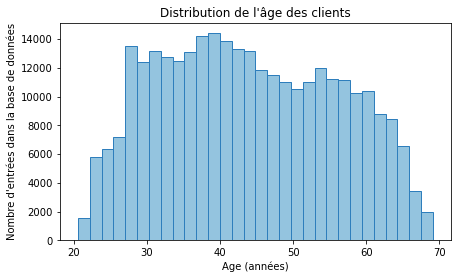

In [38]:
plt.figure(figsize=(7, 4))
plt.hist(application_train['DAYS_BIRTH'] / 365,
         edgecolor=a(0.7),
         color=a(0.4),
         bins=30)
plt.title("Distribution de l'âge des clients")
plt.xlabel('Age (années)')
plt.ylabel("Nombre d'entrées dans la base de données")

Cette représentation montre la distribution des âges en années au sein de la base de données. La distribution est plutôt uniforme entre 30 et 60 ans. Il est intéressant de regarder cette distribution en mettant en exergue la valeur associée au sein de la variable cible.

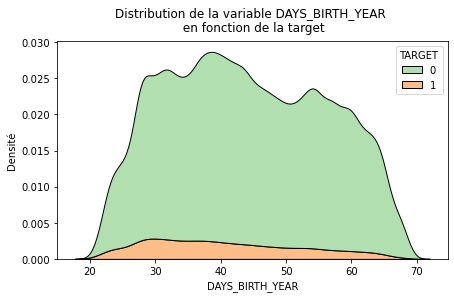

In [39]:
application_train['DAYS_BIRTH_YEAR'] = application_train['DAYS_BIRTH'] / 365
graph_hue_target(application_train, 'DAYS_BIRTH_YEAR')
plt.xlabel('DAYS_BIRTH_YEAR')
plt.show()

Pour pouvoir mieux appréhender la variable qui donne l'âge du client, il est judicieux de regrouper les entrées par classe d'âge (chaque classe ayant une étendue de 5 ans)

Cette nouvelle base de données regroupe l'intégralité des entrées pour la variable TARGET et ma variable DAYS_BIRTH ainsi que deux nouvelles variables, YEARS_BIRTH (l'âge en années) et YEARS_GROUP (la classe d'âge).

En regroupant les entrées par classe et en faisant la moyenne des cibles, il est possible de voir si des classes d'âge particulières ont tendance à plutôt rembourser leur prêt ou non. Plus la moyenne est proche de 0, plus les clients de la classe d'âge ont reboursé leur crédit. Il est facile de voir que plus l'âge augmente, plus les clients ont tendance à rembourser leur prêt.

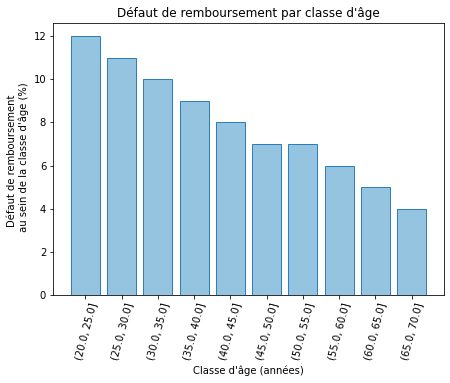

In [40]:
age_groups = groupes_age(application_train)

plt.figure(figsize=(7, 5))
plt.bar(age_groups.index.astype(str),
        100 * age_groups['TARGET'],
        color=a(0.4),
        edgecolor=a(0.7))

plt.xticks(rotation=75)
plt.xlabel("Classe d'âge (années)")
plt.ylabel("Défaut de remboursement \n au sein de la classe d'âge (%)")
plt.title("Défaut de remboursement par classe d'âge")
plt.show()

Cette représentation graphique montre la tendance selon laquelle, plus le client appartient a une classe d'âge important, plus il a remboursé son crédit. L'âge a donc une grande influence sur le remboursement du crédit. Elle sera une variable importante pour faire des prédictions.

In [41]:
del age_groups

##### La variable "DAYS_EMPLOYED"

La variable "DAYS_EMPLOYED" correspond au nombre de jour d'emploi jusqu'à la date de demande de crédit. Avant le nettoyage des données, il a été étrange de voir des valeurs positives, surtout une valeur à 365243 ! Qui correspondrait à 1000 ans !


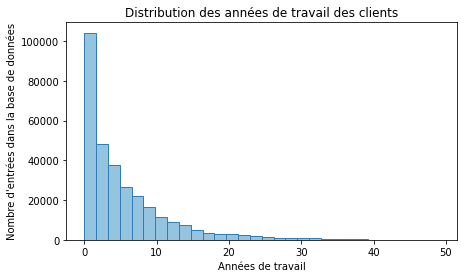

In [42]:
plt.figure(figsize=(7, 4))
plt.hist(application_train['DAYS_EMPLOYED'] / 365,
         edgecolor=a(0.7),
         color=a(0.4),
         bins=30)
plt.title("Distribution des années de travail des clients")
plt.xlabel('Années de travail')
plt.ylabel("Nombre d'entrées dans la base de données")
plt.show()

Cette représentation montre la distribution des années de travail des clients en années au sein de la base de données. La distribution montre une diminution du nombre d'entrées dans la base de données quand le nombre d'années de travail augmente. Il est intéressant de regarder cette distribution en mettant en exergue la valeur associée au sein de la variable cible.

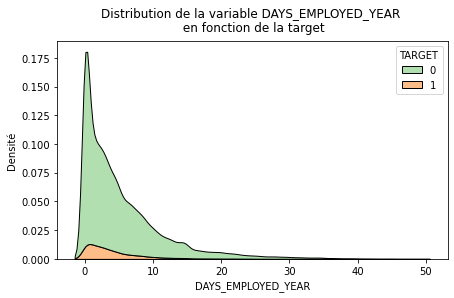

In [43]:
application_train[
    'DAYS_EMPLOYED_YEAR'] = application_train['DAYS_EMPLOYED'] / 365

graph_hue_target(application_train, 'DAYS_EMPLOYED_YEAR')
plt.xlabel('DAYS_EMPLOYED_YEAR')
plt.show()

Pour pouvoir mieux appréhender la variable qui donne le nombre d'années de travail du client, il est judicieux de regrouper les entrées par classe de durée de travail (chaque classe ayant une étendue de 5 ans)

Cette nouvelle base de données regroupe l'intégralité des entrées pour la variable TARGET et ma variable DAYS_EMPLOYED ainsi que deux nouvelles variables, YEARS_EMPLOYED  (le temps de travail en années) et YEARS_GROUP (la classe de la durée du temps de travail en années).

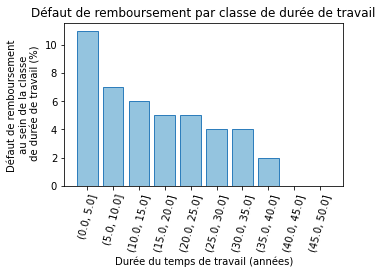

In [44]:
duree_groups = groupes_duree_empl(application_train)

plt.figure(figsize=(5, 3))

plt.bar(duree_groups.index.astype(str),
        100 * duree_groups['TARGET'],
        color=a(0.4),
        edgecolor=a(0.7))

plt.xticks(rotation=75)
plt.xlabel("Durée du temps de travail (années)")
plt.ylabel(
    "Défaut de remboursement \n au sein de la classe \n de durée de travail (%)"
)
plt.title("Défaut de remboursement par classe de durée de travail")
plt.show()

Cette représentation graphique montre la tendance selon laquelle, plus le client a travaillé avant sa demande de prêt, plus il a remboursé son crédit. Le nombre d'années de travail au moment de la demande de prêt a donc une grande influence sur le remboursement du crédit. Elle sera une variable importante pour faire des prédictions.

In [45]:
del duree_groups

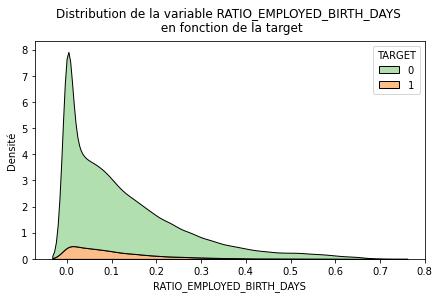

In [46]:
application_train['RATIO_EMPLOYED_BIRTH_DAYS'] = application_train[
    'DAYS_EMPLOYED'] / application_train['DAYS_BIRTH']

graph_hue_target(application_train, 'RATIO_EMPLOYED_BIRTH_DAYS')
plt.xlabel('RATIO_EMPLOYED_BIRTH_DAYS')
plt.show()

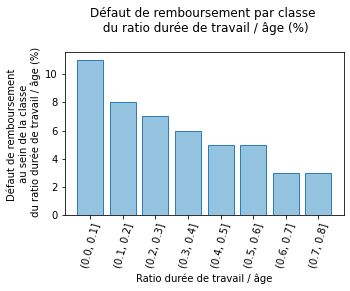

In [47]:
ratio_groups = groupes_ratio(application_train) 

plt.figure(figsize=(5, 3))

plt.bar(ratio_groups.index.astype(str),
        100 * ratio_groups['TARGET'],
        color=a(0.4),
        edgecolor=a(0.7))

plt.xticks(rotation=75)
plt.xlabel("Ratio durée de travail / âge")
plt.ylabel(
    "Défaut de remboursement \n au sein de la classe \n du ratio durée de travail / âge (%)"
)
plt.title(
    "Défaut de remboursement par classe \n du ratio durée de travail / âge (%)",
    pad=20)
plt.show()

In [48]:
del ratio_groups

## La base de données "bureau"

In [49]:
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


La base de données bureau regroupe les données des précédents crédits du clients accordés par d'autres banques. Chaque ligne correspond a un crédit, mais un client demandant un prêt peu avoir plusieurs lignes (plusieurs crédits en cours).
( 1 ligne dans la base de données application_train/test = 1 ou plusieurs lignes dans la base de données bureau)

Afin d'intégrer des informations de cette base de données dans la base de données d'entraînement il faudra pour chaque variable trouver une façon de la résumer pour l'ensemble des crédits pris pour chaque client.

In [50]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

### Quantification des valeurs manquantes

Regardons si les variables contiennent beaucoup de valeurs manquantes.

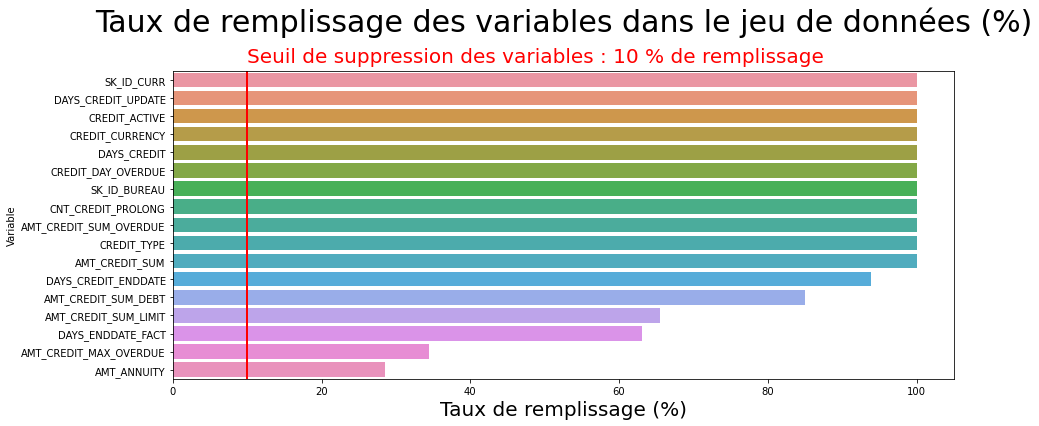

In [51]:
graphique_remplissage(bureau, 10)

Toutes les variables ont un taux de remplissage supérieur à 10%. Elles vont toutes être conservées. Après l'examen des différentes variables il faudra trouver un moyen d'imputer les valeurs manquantes.

### Les variables quantitatives

##### La variable SK_ID_BUREAU

Cette variable permet de calculer le nombre de prêt par client.

In [52]:
bureau = ajout_nb_pret(bureau)

In [53]:
bureau[bureau.SK_ID_CURR == 215354][['SK_ID_CURR','SK_ID_BUREAU','NB_CREDIT_CLIENT']]

,SK_ID_CURR,SK_ID_BUREAU,NB_CREDIT_CLIENT
0,215354,5714462,11
1,215354,5714463,11
2,215354,5714464,11
3,215354,5714465,11
4,215354,5714466,11
5,215354,5714467,11
6,215354,5714468,11
225157,215354,5714458,11
225158,215354,5714459,11
225159,215354,5714460,11


##### La variable "DAYS_CREDIT"

La variable "DAYS_CREDIT" représente le nombre de jours entre la date de la demande du prêt (de la base de données application_train ou test) et la demande correspondant à la base de données "bureau".

La majorité des clients a fait une demande "bureau" entre 500 et 1000 jours avant leur demande à "application".

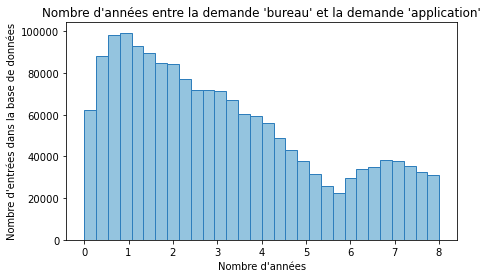

In [54]:
bureau['DAYS_CREDIT'] = abs(bureau['DAYS_CREDIT'])

plt.figure(figsize=(7, 4))

plt.hist(bureau['DAYS_CREDIT'] / 365, edgecolor=a(0.7), color=a(0.4), bins=30)
plt.title(
    "Nombre d'années entre la demande 'bureau' et la demande 'application'")
plt.xlabel("Nombre d'années")
plt.ylabel("Nombre d'entrées dans la base de données")
plt.show()

##### La variable CREDIT_DAY_OVERDUE

Grâce à cette variable, il est possible de construire une variable qui rend compte du nombre total de jours de dépassement pour l'ensemble des crédits ainsi qu'une variable qui donne la moyenne de jours de dépassement.

In [55]:
bureau = ajout_depassement_credit(bureau)

In [56]:
bureau[bureau['SK_ID_CURR'] == 446640][['SK_ID_CURR','SK_ID_BUREAU','NB_CREDIT_CLIENT','NB_TOT_J_DEPASS','MOY_J_DEPASS']]

,SK_ID_CURR,SK_ID_BUREAU,NB_CREDIT_CLIENT,NB_TOT_J_DEPASS,MOY_J_DEPASS
2059,446640,5717021,9,100,11.1
2060,446640,5717023,9,100,11.1
2061,446640,5717024,9,100,11.1
2062,446640,5717025,9,100,11.1
2063,446640,5717026,9,100,11.1
2064,446640,5717027,9,100,11.1
2065,446640,5717028,9,100,11.1
2066,446640,5717029,9,100,11.1
1673771,446640,5717022,9,100,11.1


##### La variable 'CNT_CREDIT_PROLONG'

La variable 'CNT_CREDIT_PROLONG' représente le nombre de fois où la durée du crédit a été prolongée.

In [57]:
taux_non_prolong = (bureau[bureau['CNT_CREDIT_PROLONG'] == 0].shape[0] /
                    bureau.shape[0]) * 100
print(
    "Les crédits qui n'ont pas bénéficiés d'une prolongation représentent %.2f %% des valeurs de la base de données"
    % taux_non_prolong)

Les crédits qui n'ont pas bénéficiés d'une prolongation représentent 99.47 % des valeurs de la base de données


In [58]:
bureau = ajout_prolong_credit(bureau)

In [59]:
bureau[bureau['NB_PROLONG'] > 0][['SK_ID_CURR','SK_ID_BUREAU','NB_CREDIT_CLIENT','NB_PROLONG']].head(5)

,SK_ID_CURR,SK_ID_BUREAU,NB_CREDIT_CLIENT,NB_PROLONG
462,118247,5715070,8,2
463,118247,5715072,8,2
464,118247,5715073,8,2
465,118247,5715074,8,2
466,118247,5715075,8,2


##### La variable 'AMT_CREDIT_SUM'

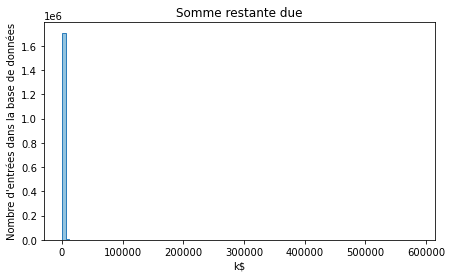

In [60]:
bureau['AMT_CREDIT_SUM'] = bureau['AMT_CREDIT_SUM'] / 1000

plt.figure(figsize=(7, 4))
plt.hist(bureau['AMT_CREDIT_SUM'], edgecolor=a(0.7), color=a(0.4), bins=100)
plt.title("Somme restante due")
plt.xlabel("k$")
plt.ylabel("Nombre d'entrées dans la base de données")
plt.show()

Pour pouvoir intégrer cette  variable dans la base de données train, elle sera transformée pour n'avoir que la moyenne et le max pour un client donné.

In [61]:
bureau = ajout_moy_som_credit(bureau)

In [62]:
bureau[bureau.SK_ID_CURR == 215354][['SK_ID_CURR','SK_ID_BUREAU','AMT_CREDIT_SUM_k_MEAN','AMT_CREDIT_SUM_k_SUM']]

,SK_ID_CURR,SK_ID_BUREAU,AMT_CREDIT_SUM_k_MEAN,AMT_CREDIT_SUM_k_SUM
0,215354,5714462,543.09,5973.95
1,215354,5714463,543.09,5973.95
2,215354,5714464,543.09,5973.95
3,215354,5714465,543.09,5973.95
4,215354,5714466,543.09,5973.95
5,215354,5714467,543.09,5973.95
6,215354,5714468,543.09,5973.95
225157,215354,5714458,543.09,5973.95
225158,215354,5714459,543.09,5973.95
225159,215354,5714460,543.09,5973.95


##### La variable 'AMT_CREDIT_SUM_DEBT'

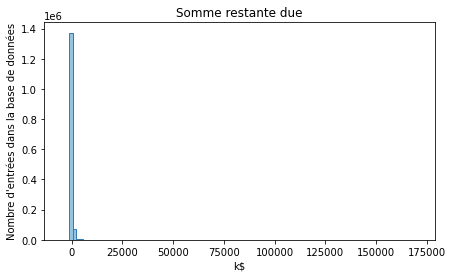

In [63]:
bureau['AMT_CREDIT_SUM_DEBT'] = bureau['AMT_CREDIT_SUM_DEBT'] / 1000

plt.figure(figsize=(7, 4))
plt.hist(bureau['AMT_CREDIT_SUM_DEBT'],
         edgecolor=a(0.7),
         color=a(0.4),
         bins=100)
plt.title("Somme restante due")
plt.xlabel("k$")
plt.ylabel("Nombre d'entrées dans la base de données")
plt.show()

Somme totale des SUM_DEBT par demandeur

In [64]:
bureau = ajout_nb_moy_debt(bureau)

In [65]:
bureau[bureau.SK_ID_CURR == 215354][['SK_ID_CURR','SK_ID_BUREAU','MOY_DEBT','SOMME_DEBT']]

,SK_ID_CURR,SK_ID_BUREAU,MOY_DEBT,SOMME_DEBT
0,215354,5714462,47.4,284.46318
1,215354,5714463,47.4,284.46318
2,215354,5714464,47.4,284.46318
3,215354,5714465,47.4,284.46318
4,215354,5714466,47.4,284.46318
5,215354,5714467,47.4,284.46318
6,215354,5714468,47.4,284.46318
225157,215354,5714458,47.4,284.46318
225158,215354,5714459,47.4,284.46318
225159,215354,5714460,47.4,284.46318


### Les variables de catégories

##### La variable "CREDIT_ACTIVE"

In [66]:
bureau['CREDIT_ACTIVE'].value_counts()

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64

In [67]:
bureau['CREDIT_ACTIVE'].unique()

array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object)

La variable "CREDIT_ACTIVE" contient 4 modalités :
    - 'Closed'
    - 'Active'
    - 'Sold'
    - 'Bad debt'

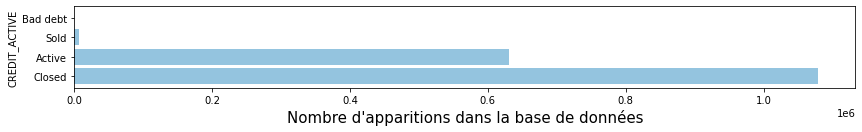

In [68]:
para = int(len(bureau['CREDIT_ACTIVE'].value_counts()) * 3)
plt.rcParams["figure.figsize"] = (14, para / 8)

p1 = plt.barh(bureau['CREDIT_ACTIVE'].unique(),
              bureau['CREDIT_ACTIVE'].value_counts(),
              color=a(0.4))

plt.ylabel('CREDIT_ACTIVE')
plt.xlabel("Nombre d'apparitions dans la base de données", fontsize=15)
plt.show()

La majorité des crédits dans la base de données "bureau" a un statut "Closed" (fermé). Une autre partie importante de cette base de données a un statut "Active" (actif).
Une petite partie des crédits sont soit "Sold" (vendu) ou "Bad Debt" (créance irrécouvrable).

Comme la modalité Bad Debt et Sold sont similaires en signification et qu'elles ont un faible taux d'apparition dans la base de données, elles sont regroupées sous la même modalité "Sold or Bad Debt".

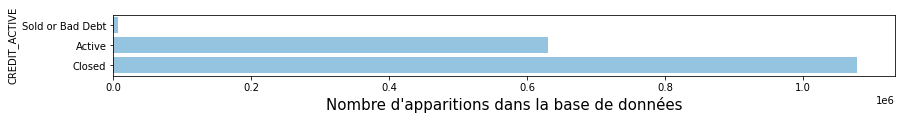

In [69]:
bureau['CREDIT_ACTIVE'].replace('Sold', 'Sold or Bad Debt', inplace=True)
bureau['CREDIT_ACTIVE'].replace('Bad debt', 'Sold or Bad Debt', inplace=True)

para = int(len(bureau['CREDIT_ACTIVE'].value_counts()) * 3)
plt.rcParams["figure.figsize"] = (14, para / 8)

p1 = plt.barh(bureau['CREDIT_ACTIVE'].unique(),
              bureau['CREDIT_ACTIVE'].value_counts(),
              color=a(0.4))

plt.ylabel('CREDIT_ACTIVE')
plt.xlabel("Nombre d'apparitions dans la base de données", fontsize=15)
plt.show()

Pour pouvoir transporter cette information vers une base de données avec les SK_ID_CURR comme index, il va falloir créer 3 nouvelles colonnes qui rendent compte du nombre de "Closed", "Active" et "Sold or Bad Debt" par client.

Seules ces trois nouvelles variables seront ajoutées à la base de données d'entraînement.

In [70]:
bureau = ajout_etat_credit(bureau)

In [71]:
bureau[bureau.SK_ID_CURR == 215354][['SK_ID_CURR','SK_ID_BUREAU','RATIO_CLOS','RATIO_ACTIF','RATIO_BAD']]

,SK_ID_CURR,SK_ID_BUREAU,RATIO_CLOS,RATIO_ACTIF,RATIO_BAD
0,215354,5714462,0.45,0.55,0.0
1,215354,5714463,0.45,0.55,0.0
2,215354,5714464,0.45,0.55,0.0
3,215354,5714465,0.45,0.55,0.0
4,215354,5714466,0.45,0.55,0.0
5,215354,5714467,0.45,0.55,0.0
6,215354,5714468,0.45,0.55,0.0
225157,215354,5714458,0.45,0.55,0.0
225158,215354,5714459,0.45,0.55,0.0
225159,215354,5714460,0.45,0.55,0.0


##### La variable "CREDIT_CURRENCY"

In [72]:
bureau['CREDIT_CURRENCY'].value_counts()

currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: CREDIT_CURRENCY, dtype: int64

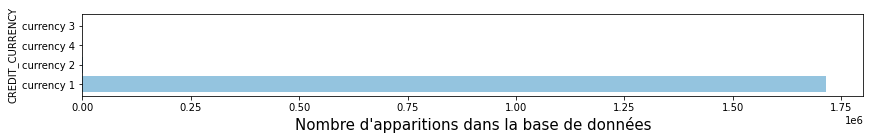

In [73]:
para = int(len(bureau['CREDIT_CURRENCY'].value_counts()) * 3)
plt.rcParams["figure.figsize"] = (14, para / 8)

p1 = plt.barh(bureau['CREDIT_CURRENCY'].unique(),
              bureau['CREDIT_CURRENCY'].value_counts(),
              color=a(0.4))

plt.ylabel('CREDIT_CURRENCY')
plt.xlabel("Nombre d'apparitions dans la base de données", fontsize=15)
plt.show()

La variable 'CREDIT_CURRENCY' correspond à un codage propre à bureau. Elle ne sera ni remplacée par seulement ces chiffres pour éviter de mettre du poids sur ces modalités, ni modifiée en transvasant une modalité dans une autre.

In [74]:
one_hot = pd.get_dummies(bureau['CREDIT_CURRENCY'])
bureau = bureau.join(one_hot)
bureau = bureau.drop(['CREDIT_CURRENCY'], axis=1)

Pour pouvoir être davantage précis, nous allons plutôt utiliser un ratio currency/nombre total de crédit.

In [75]:
bureau = ajout_ratio_currency(bureau)

In [76]:
bureau[bureau.SK_ID_CURR == 215354][['SK_ID_CURR','SK_ID_BUREAU','RATIO_CURRENCY_1','RATIO_CURRENCY_2','RATIO_CURRENCY_3','RATIO_CURRENCY_4']]

,SK_ID_CURR,SK_ID_BUREAU,RATIO_CURRENCY_1,RATIO_CURRENCY_2,RATIO_CURRENCY_3,RATIO_CURRENCY_4
0,215354,5714462,1.0,0.0,0.0,0.0
1,215354,5714463,1.0,0.0,0.0,0.0
2,215354,5714464,1.0,0.0,0.0,0.0
3,215354,5714465,1.0,0.0,0.0,0.0
4,215354,5714466,1.0,0.0,0.0,0.0
5,215354,5714467,1.0,0.0,0.0,0.0
6,215354,5714468,1.0,0.0,0.0,0.0
225157,215354,5714458,1.0,0.0,0.0,0.0
225158,215354,5714459,1.0,0.0,0.0,0.0
225159,215354,5714460,1.0,0.0,0.0,0.0


##### La variable 'CREDIT_TYPE'

In [77]:
bureau['CREDIT_TYPE'].value_counts()

Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: CREDIT_TYPE, dtype: int64

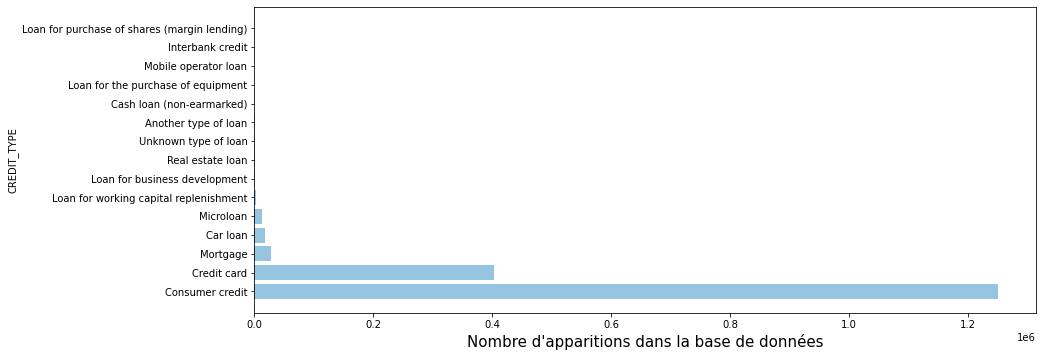

In [78]:
para = int(len(bureau['CREDIT_TYPE'].value_counts()) * 3)
plt.rcParams["figure.figsize"] = (14, para / 8)

p1 = plt.barh(bureau['CREDIT_TYPE'].unique(),
              bureau['CREDIT_TYPE'].value_counts(),
              color=a(0.4))

plt.ylabel('CREDIT_TYPE')
plt.xlabel("Nombre d'apparitions dans la base de données", fontsize=15)
plt.show()

La majorité des crédits dans la base de données "bureau" sont de type "Consumer Credit" ou de type "Credit Card".

Cette variable permet de déterminer le nombre de type de crédit différent par clients. Par exemple, pour le client qui possède le SK_ID_CURR 215354, ce nombre sera égal à 3 car il a eu 3 types de crédit : "consumer credit", "credit card" et "car loan".

In [79]:
bureau[bureau.SK_ID_CURR == 215354][['SK_ID_CURR','SK_ID_BUREAU','CREDIT_TYPE']]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_TYPE
0,215354,5714462,Consumer credit
1,215354,5714463,Credit card
2,215354,5714464,Consumer credit
3,215354,5714465,Credit card
4,215354,5714466,Consumer credit
5,215354,5714467,Credit card
6,215354,5714468,Consumer credit
225157,215354,5714458,Consumer credit
225158,215354,5714459,Car loan
225159,215354,5714460,Consumer credit


In [80]:
type_credit_client = bureau[[
    'SK_ID_CURR', 'CREDIT_TYPE'
]].groupby(by=['SK_ID_CURR'])['CREDIT_TYPE'].nunique()
type_credit_client = type_credit_client.reset_index().rename(
    columns={'CREDIT_TYPE': 'TYPE_CREDIT_CLIENT'})
bureau = bureau.merge(type_credit_client, on='SK_ID_CURR', how='left')

In [81]:
bureau[bureau.SK_ID_CURR == 215354][['SK_ID_CURR','SK_ID_BUREAU','CREDIT_TYPE','TYPE_CREDIT_CLIENT']]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_TYPE,TYPE_CREDIT_CLIENT
0,215354,5714462,Consumer credit,3
1,215354,5714463,Credit card,3
2,215354,5714464,Consumer credit,3
3,215354,5714465,Credit card,3
4,215354,5714466,Consumer credit,3
5,215354,5714467,Credit card,3
6,215354,5714468,Consumer credit,3
225157,215354,5714458,Consumer credit,3
225158,215354,5714459,Car loan,3
225159,215354,5714460,Consumer credit,3


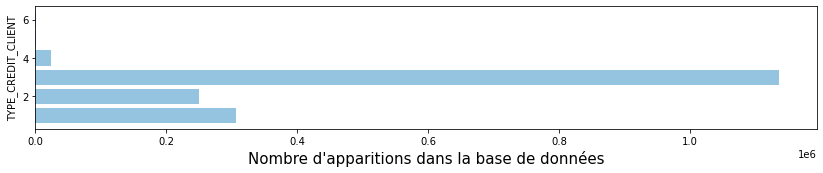

In [82]:
para = int(len(bureau['TYPE_CREDIT_CLIENT'].value_counts()) * 3)
plt.rcParams["figure.figsize"] = (14, para / 8)

p1 = plt.barh(bureau['TYPE_CREDIT_CLIENT'].unique(),
              bureau['TYPE_CREDIT_CLIENT'].value_counts(),
              color=a(0.4))

plt.ylabel('TYPE_CREDIT_CLIENT')
plt.xlabel("Nombre d'apparitions dans la base de données", fontsize=15)
plt.show()

Dans la majorité des cas, les clients ont 3 types de crédit différents. Seule cette information sera conservée pour la passage à la base de données d'entraînement.

### Fonction de nettoyage et de transformation de la base de données bureau

In [83]:
bureau = bureau_fe()

la base de données bureau a été nettoyée et 31 nouvelles variables ont été crées


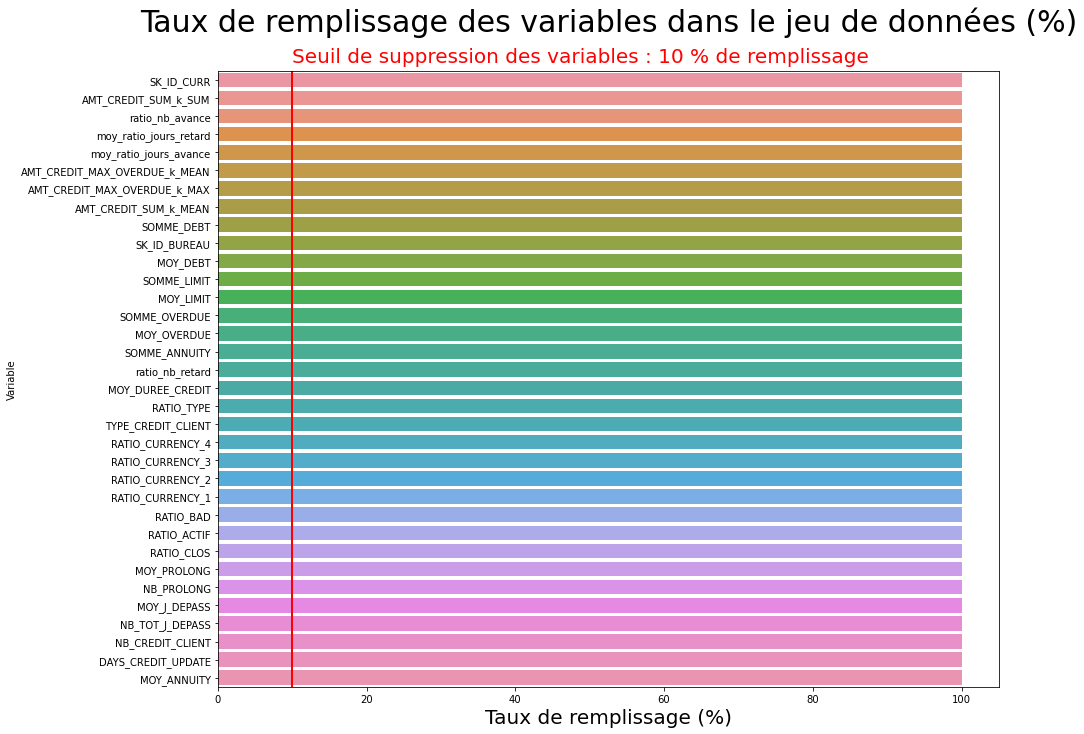

In [84]:
graphique_remplissage(bureau, 10)

In [85]:
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT_UPDATE,NB_CREDIT_CLIENT,NB_TOT_J_DEPASS,MOY_J_DEPASS,NB_PROLONG,MOY_PROLONG,RATIO_CLOS,RATIO_ACTIF,...,AMT_CREDIT_SUM_k_MEAN,AMT_CREDIT_SUM_k_SUM,SOMME_DEBT,MOY_DEBT,SOMME_LIMIT,MOY_LIMIT,SOMME_OVERDUE,MOY_OVERDUE,SOMME_ANNUITY,MOY_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,...,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06
mean,2.782149e+05,5.924434e+06,5.914303e+02,9.109767e+00,6.265130e+00,8.181648e-01,5.475208e-02,6.358379e-03,6.289512e-01,3.672294e-01,...,3.549977e+02,3.033431e+03,9.153383e+02,1.165059e+02,3.775754e+01,4.081512e+00,3.151929e-01,3.781609e-02,4.240200e+01,4.482249e+00
std,1.029386e+05,5.322657e+05,6.519824e+02,5.990366e+00,1.033070e+02,1.716706e+01,2.893916e-01,4.254836e-02,2.314240e-01,2.309899e-01,...,6.558454e+02,5.659212e+03,2.092331e+03,3.075865e+02,1.287265e+02,1.618424e+01,1.807266e+01,3.178369e+00,6.576143e+02,6.649002e+01
min,1.000010e+05,5.000000e+06,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-6.981558e+03,-1.083600e+03,-5.798541e+02,-6.530000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.888668e+05,5.463954e+06,3.300000e+01,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-01,2.000000e-01,...,1.223500e+02,8.266600e+02,6.247350e+01,8.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.780550e+05,5.926304e+06,3.950000e+02,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.700000e-01,3.300000e-01,...,2.161600e+02,1.815230e+03,3.786795e+02,4.530000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.674260e+05,6.385681e+06,9.080000e+02,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.900000e-01,5.000000e-01,...,3.979300e+02,3.693030e+03,1.038470e+03,1.188000e+02,1.278765e+00,1.000000e-01,0.000000e+00,0.000000e+00,2.385450e+01,2.900000e+00
max,4.562550e+05,6.843457e+06,2.917000e+03,1.160000e+02,5.250000e+03,2.776000e+03,9.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00,...,1.980723e+05,1.017958e+06,3.344983e+05,5.175000e+04,8.129328e+03,1.755000e+03,3.756681e+03,1.617400e+03,1.187355e+05,2.728240e+04


### La base de données "bureau_balance"

La base de données bureau_balance correspond aux données de la base de données bureau mais par mois. Chaque ligne correspond à un mois de crédit. Il y a autant de lignes que le crédit a de mois.

Le code "SK_ID_BUREAU" correspond au même code que dans la base de données "bureau".

In [86]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


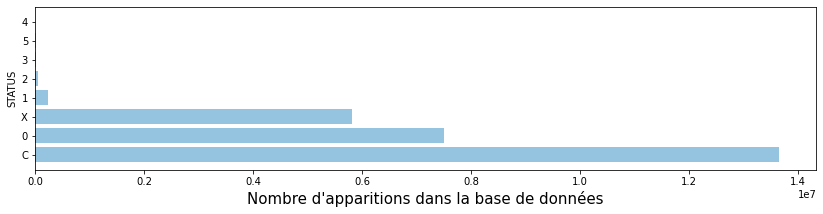

In [87]:
para = int(len(bureau_balance['STATUS'].value_counts()) * 3)
plt.rcParams["figure.figsize"] = (14, para / 8)

p1 = plt.barh(bureau_balance['STATUS'].unique(),
              bureau_balance['STATUS'].value_counts(),
              color=a(0.4))

plt.ylabel('STATUS')
plt.xlabel("Nombre d'apparitions dans la base de données", fontsize=15)
plt.show()

In [88]:
bureau_balance['STATUS'].value_counts(dropna=False)

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

In [89]:
bureau_balance = pd.get_dummies(bureau_balance, 'STATUS')

In [90]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,5715448,0,0,0,0,0,0,0,1,0
1,5715448,-1,0,0,0,0,0,0,1,0
2,5715448,-2,0,0,0,0,0,0,1,0
3,5715448,-3,0,0,0,0,0,0,1,0
4,5715448,-4,0,0,0,0,0,0,1,0


# Préparation des bases de données à partir des fonctions personnalisées de features engineering

## Sans les nouvelles variables

### La base de données application_train seule

In [91]:
df_ss_nv = application_train_net()
df_ss_nv.replace([np.inf, -np.inf], np.nan, inplace=True)
df_ss_nv = df_ss_nv.fillna(0)

La base de données 'application_train' présente  307511 entrées pour  122 variables
L'étape de nettoyage des variables est terminée


## Avec les nouvelles variables

## La base de données application_train seule

In [92]:
df_nv = fe(0)
df_nv.replace([np.inf, -np.inf], np.nan, inplace=True)
df_nv = df_nv.fillna(0)

La base de données 'application_train' présente  307511 entrées pour  122 variables
L'étape de nettoyage des variables est terminée
L'étape de création de nouvelles variables est terminée.  15 nouvelles variables ont été crées
df shape: (307506, 71)


## Les bases de données application_train et bureau + bureau_balance

In [93]:
df_nv_2 = fe(1)
df_nv_2.replace([np.inf, -np.inf], np.nan, inplace=True)
df_nv_2 = df_nv_2.fillna(0)

La base de données 'application_train' présente  307511 entrées pour  122 variables
L'étape de nettoyage des variables est terminée
L'étape de création de nouvelles variables est terminée.  15 nouvelles variables ont été crées
la base de données bureau a été nettoyée et 31 nouvelles variables ont été crées
les bases de données bureau et bureau_balance ont été assemblées
les bases de données bureau et bureau_balance ont été moyennées suivant SK_ID_CURR
Bureau df shape: (305811, 41)
df shape: (307506, 112)


## L'intégralité des bases de données

In [94]:
df_nv_3 = fe(2)
df_nv_3.replace([np.inf, -np.inf], np.nan, inplace=True)
df_nv_3 = df_nv_3.fillna(0)

La base de données 'application_train' présente  307511 entrées pour  122 variables
L'étape de nettoyage des variables est terminée
L'étape de création de nouvelles variables est terminée.  15 nouvelles variables ont été crées
la base de données bureau a été nettoyée et 31 nouvelles variables ont été crées
les bases de données bureau et bureau_balance ont été assemblées
les bases de données bureau et bureau_balance ont été moyennées suivant SK_ID_CURR
Bureau df shape: (305811, 41)
Previous applications df shape: (338857, 240)
Pos-cash balance df shape: (337252, 18)
Installments payments df shape: (339587, 24)
Credit card balance df shape: (103558, 141)
df shape: (307506, 535)


# Sources et inspirations

- inspiration pour le nettoyage et la transformation des données :

    https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script
    
    https://medium.com/analytics-vidhya/home-credit-default-risk-part-1-business-understanding-data-cleaning-and-eda-1203913e979c
    
    https://www.kaggle.com/c/home-credit-default-risk/discussion/64821
    
    https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda
    
    https://medium.com/@dhruvnarayanan20/home-credit-default-risk-part-2-feature-engineering-and-modelling-i-be9385ad77fd